# K-means своими руками

### Кластеризация городов

Изучать кластеризацию удобно на географических данных (координатах каких-либо объектов), потому что такие объекты имеют два признака (удобно визуализировать) и часто образуют кластеры. Мы будем использовать набор коодинат российских населенных пунктов.

Ссылка на данные:

In [34]:
data_link = "https://raw.githubusercontent.com/nadiinchi/HSE_minor_DataAnalysis_seminars_iad16/master/materials/sem_b3_coord.csv"

In [35]:
import pandas 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [36]:
data = pandas.read_csv(data_link)

In [37]:
data.head()

,LAT,LONG
0,49.987000,142.157883
1,49.964722,143.263031
2,49.822498,142.154556
3,49.770195,144.087326
4,49.668335,144.100281


Визуализируем точки:

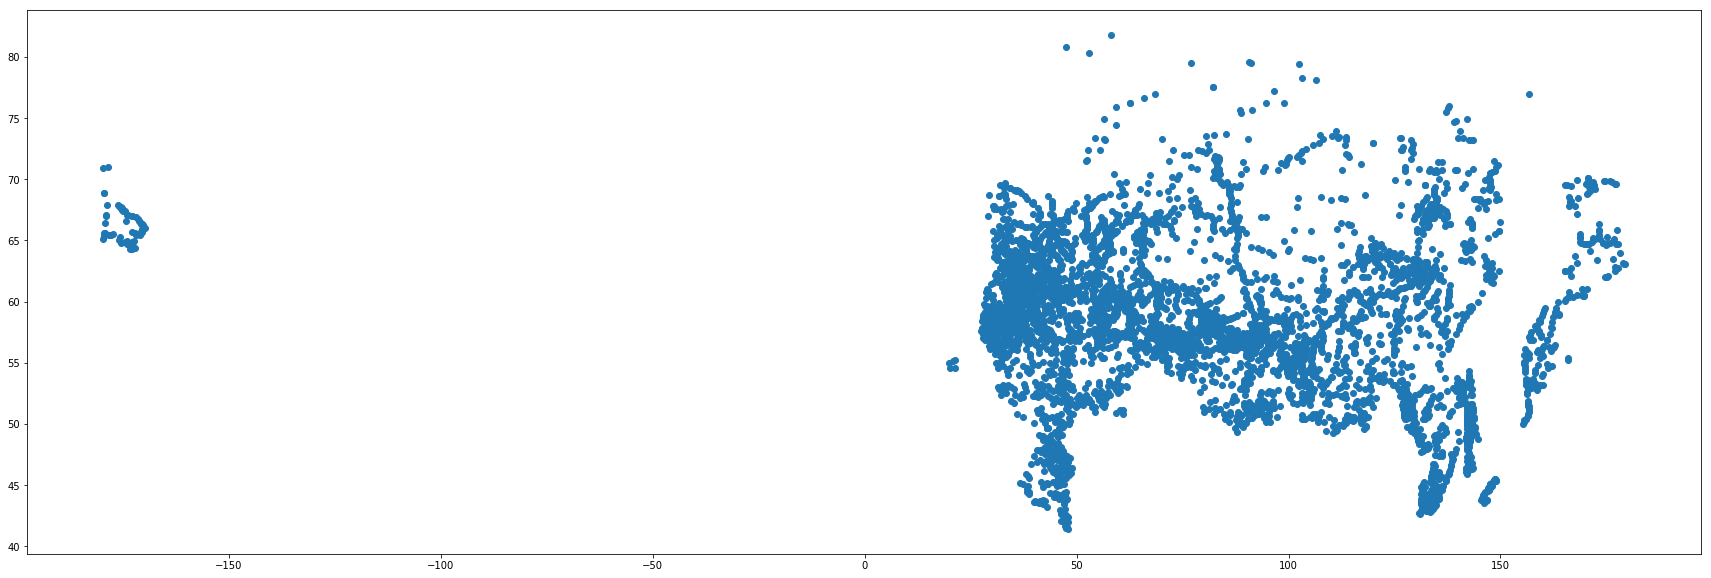

In [5]:
plt.figure(figsize= (30,10))
plt.scatter(data['LONG'], data['LAT'])

Картина напоминает очертания России :) Слева - Калининградская область. Разумеется, расстояния искажаются, потому что мы отображаем точки в декартовой системе координат, а не на сфере. Этот же эффект бует иметь место при кластеризации.

Наиболее распространеннный метод кластеризации - k-means. Принцип его работы крайне прост. Мы по очереди выполняем два шага: поиск центра каждого кластера по точкам, которые ему принадлежат, и определение кластера для каждой точки. Реализуем k-means самостоятельно: напишем класс с методами fit и transform, по аналогии с интерфейсом sklearn.

In [38]:
from sklearn.metrics import pairwise_distances

In [41]:
class k_means:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        X - выборка размера количество объектов x количество признаков
        max_iter - максимальное число итераций
        visualize - визуализировать точки на каждой итерации
        """
        #The goal: create self.centers
        
        # init y (randomly)
        num_obj = X.shape[0]
        num_feat = X.shape[1]
        y = np.random.randint(0, self.n_clusters, \
                              size=num_obj)
        # init centers (zero matrix)
        self.centers = np.zeros((self.n_clusters, num_feat))
        
        for _ in range(max_iter):
            # update centers
            for c in range(self.n_clusters):
                self.centers[c] = X[y==c].mean(axis=0)
            # update y
            dists = pairwise_distances(X, self.centers)
            # shape (num_obj, self.n_clusters)
            y = np.argmin(dists, axis=1)
    
    def transform(self, X):
        """
        X - выборка размера количество объектов x количество признаков
        """
        # The goal: return y (predictions \in {0, ..., C-1})
        dists = pairwise_distances(X, self.centers)
        return np.argmin(dists, axis=1)

In [49]:
cls = k_means(10)
cls.fit(data.values)
y = cls.transform(data.values)

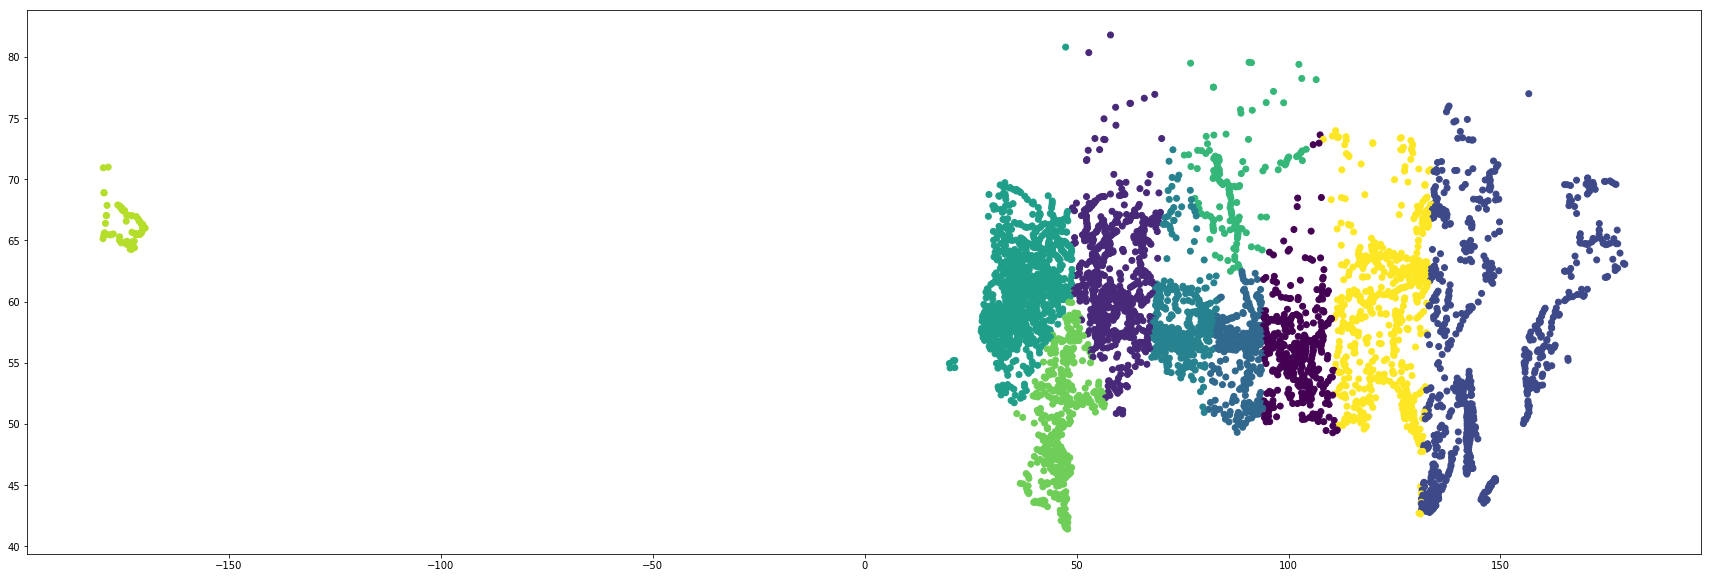

In [50]:
plt.figure(figsize= (30,10))
plt.scatter(data['LONG'], data['LAT'], c=y)

### Кластеризация пикселей

Скачайте [картинку](https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png)

Применим наш метод кластеризации к сегментации изображений. Для этого загрузим картинку и будем каждый ее пиксель рассматривать как отдельный объект с тремя признаками R G B,отвечающими за цвет пикселя. Нам понадобится изменить форму тензора с изображением, вытянув все пиксели вдоль одной оси, чтобы получить матрицу объекты-признаки.

In [52]:
img = plt.imread("apple.png")
img.shape

(237, 316, 3)

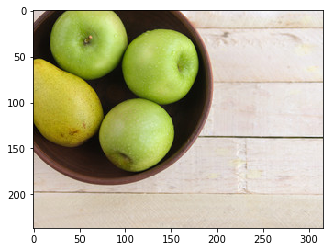

In [53]:
plt.imshow(img)

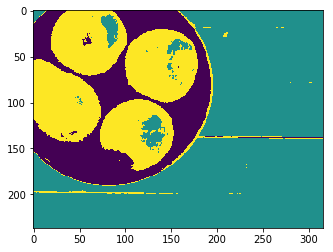

In [54]:
X = img.reshape(-1, 3)
cls = k_means(3)
cls.fit(X)
y = cls.transform(X)
plt.imshow(y.reshape(img.shape[:2]))

Обратите внимание, что при кластеризации никак не учитывалась информация о положении пикселя на изображении, а учитывался только цвет.

### Кластеризация цифр

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits()

In [10]:
digits = digits["data"]

In [13]:
digits.shape

(1797, 64)